In [1]:
import sys
sys.path.append('/home/djs10/gitlab/msdc_services/libraries')
from massspec.data_specs.spectral_library import LibraryAccessor

In [2]:
import logging
lg = logging.getLogger()
lg.addHandler(logging.FileHandler('/home/djs10/tmp/massspec.log', mode='w', encoding='utf-8'))
lg.setLevel(logging.INFO)
lg.info("First line logged successfully!")
lg

INFO:root:First line logged successfully!


<RootLogger root (INFO)>

# Speed Tests for Poster

## PyArrow, from arrow branch

In [1]:
%%time
import pyarrow.parquet as pq
import pandas as pd

FILENAME = '/data/aiomics/search/pyarrow/hr_msms_nist2020_v42_0_hybrid_truc_v2_lz4.parquet'
table = pq.read_table(FILENAME)

pd.set_option("display.max_columns", 70)
table.to_pandas()

CPU times: user 18.6 s, sys: 9.85 s, total: 28.5 s
Wall time: 16.8 s


,id,charge,ev,instrument,instrument_type,ion_mode,ionization,name,nce,intensity,product_massinfo,mz,precursor_intensity,precursor_massinfo,precursor_mz,spectrum_fp,spectrum_fp_count,aromatic_rings,collision_energy,collision_gas,column,ecfp4,ecfp4_count,estimated_ri,estimated_ri_error,exact_mass,exact_mw,experimental_ri,experimental_ri_data,experimental_ri_error,formula,has_2d,has_conformer,has_tms,hba,hbd,inchi_key,inchi_key_orig,insource_voltage,isomeric_smiles,mol,num_atoms,num_undef_double,num_undef_stereo,rotatable_bonds,sample_inlet,set,smiles,stdnp,stdnp_data,stdnp_error,stdpolar,stdpolar_data,stdpolar_error,synonyms,tpsa,vial_id
0,1035166,1,NaN,Agilent QTOF 6530,Q-TOF,P,ESI,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",NaN,"[46.35, 51.85, 41.36, 669.33, 40.76, 51.85, 40...","{'tolerance': 10.0, 'tolerance_type': 'ppm', '...","[45.96, 597.48, 598.5, 599.5, 600.52, 951.77, ...",NaN,"{'tolerance': 10.0, 'tolerance_type': 'ppm', '...",1467.0061,"[0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13,0,8.0,N2,None,"[12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",132,NaN,NaN,1448.97223,1448.972226,NaN,NaN,NaN,C81H142O17P2,True,False,0,15,3,LSHJMDWWJIYXEM-XGJIDDIWSA-N,LSHJMDWWJIYXEM-XGJIDDIWSA-N,150.0,CCCCC/C=C\C/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O)...,"""{\""commonchem\"":{\""version\"":10},\""defaults\""...",100,0,0,74,direct flow injection,train,CCCCCC=CCC=CCCCCCCCC(=O)OCC(COP(=O)(O)OCC(O)CO...,NaN,NaN,NaN,NaN,NaN,NaN,"[""Heart CA, main component"", ""8,11-Octadecadie...",236.95,4487.0
1,1035167,1,NaN,Agilent QTOF 6530,Q-TOF,P,ESI,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",NaN,"[50.95, 683.32, 999.0, 43.56, 46.35, 50.65, 56...","{'tolerance': 10.0, 'tolerance_type': 'ppm', '...","[597.5, 599.5, 1449.98, 1450.98, 1465.98, 1466...",NaN,"{'tolerance': 10.0, 'tolerance_type': 'ppm', '...",1467.0061,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7,0,10.0,N2,None,"[12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",132,NaN,NaN,1448.97223,1448.972226,NaN,NaN,NaN,C81H142O17P2,True,False,0,15,3,LSHJMDWWJIYXEM-XGJIDDIWSA-N,LSHJMDWWJIYXEM-XGJIDDIWSA-N,150.0,CCCCC/C=C\C/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O)...,"""{\""commonchem\"":{\""version\"":10},\""defaults\""...",100,0,0,74,direct flow injection,train,CCCCCC=CCC=CCCCCCCCC(=O)OCC(COP(=O)(O)OCC(O)CO...,NaN,NaN,NaN,NaN,NaN,NaN,"[""Heart CA, main component"", ""8,11-Octadecadie...",236.95,4487.0
2,1035168,1,NaN,Agilent QTOF 6530,Q-TOF,P,ESI,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",NaN,"[55.94, 999.0, 42.26, 853.85, 139.16]","{'tolerance': 10.0, 'tolerance_type': 'ppm', '...","[537.39, 599.5, 600.51, 1449.98, 1467.0]",NaN,"{'tolerance': 10.0, 'tolerance_type': 'ppm', '...",1467.0061,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,0,14.0,N2,None,"[12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",132,NaN,NaN,1448.97223,1448.972226,NaN,NaN,NaN,C81H142O17P2,True,False,0,15,3,LSHJMDWWJIYXEM-XGJIDDIWSA-N,LSHJMDWWJIYXEM-XGJIDDIWSA-N,150.0,CCCCC/C=C\C/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O)...,"""{\""commonchem\"":{\""version\"":10},\""defaults\""...",100,0,0,74,direct flow injection,train,CCCCCC=CCC=CCCCCCCCC(=O)OCC(COP(=O)(O)OCC(O)CO...,NaN,NaN,NaN,NaN,NaN,NaN,"[""Heart CA, main component"", ""8,11-Octadecadie...",236.95,4487.0
3,1035169,1,NaN,Agilent QTOF 6530,Q-TOF,P,ESI,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",NaN,"[41.86, 45.15, 999.0, 43.86, 41.86, 452.85, 18...","{'tolerance': 10.0, 'tolerance_type': 'ppm', '...","[597.46, 598.5, 599.51, 600.49, 1448.92, 1449....",NaN,"{'tolerance': 10.0, 'tolerance_type': 'ppm', '...",1467.0061,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,0,16.0,N2,None,"[12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",132,NaN,NaN,1448.97223,1448.972226,NaN,NaN,NaN,C81H142O17P2,True,False,0,15,3,LSHJMDWWJIYXEM-XGJIDDIWSA-N,LSHJMDWWJIYXEM-XGJIDDIWSA-N,150.0,CCCCC/C=C\C/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O)...,"""{\""commonchem\"":{\""version\"":10},\""defaults\""...",100,0,0,74,direct flow injection,train,CCCCCC=CCC=CCCCC

In [3]:
%%time
import pyarrow.parquet as pq
import pandas as pd

#import sys
#import pyarrow as pa
#import pyarrow.compute as pc
#import numpy as np

FILENAME = '/data/aiomics/search/pyarrow/hr_msms_nist2020_v42_0_hybrid_truc_v2_lz4.parquet'
only_cols = ["id", "name", "mz", "intensity"]
filter_list = [ 
    ('ion_mode','=','P'),
    ('instrument_type','=','HCD'),
    ('precursor_mz','>', 300.0),
    ('precursor_mz','<', 300.1)
]

table = pq.read_table(FILENAME, columns=only_cols, filters=filter_list)

pd.set_option("display.max_columns", 70)
table.to_pandas()

CPU times: user 1.12 s, sys: 570 ms, total: 1.69 s
Wall time: 794 ms


,id,name,mz,intensity
0,1245449,Chlordiazepoxide,"[60.0443, 227.0485, 231.068, 241.0524, 269.047...","[1.1, 2.1, 1.1, 25.97, 4.9, 4.7, 12.29, 109.89..."
1,1245450,Chlordiazepoxide,"[57.0433, 60.0444, 227.0486, 231.0681, 241.052...","[1.2, 4.0, 8.89, 6.29, 96.5, 1.6, 2.2, 4.4, 1...."
2,1245451,Chlordiazepoxide,"[57.0448, 60.0444, 105.0336, 165.0697, 180.044...","[3.7, 8.49, 3.3, 4.0, 1.9, 3.7, 53.55, 12.09, ..."
3,1245452,Chlordiazepoxide,"[57.0447, 60.0442, 89.0384, 105.0333, 165.0696...","[14.09, 8.29, 4.0, 4.5, 14.59, 7.99, 1.3, 2.5,..."
4,1245453,Chlordiazepoxide,"[57.0447, 60.0441, 89.0383, 104.0495, 105.0333...","[49.85, 10.19, 6.69, 1.6, 7.69, 1.9, 30.67, 3...."
...,...,...,...,...
736,3475595,tert-Butyl 4-(bromomethylidene)piperidine-1-ca...,"[56.0495, 65.0386, 67.0417, 67.0543, 68.0495, ...","[2.1, 10.79, 9.49, 28.47, 4.4, 2.5, 3.9, 12.99..."
737,3475596,tert-Butyl 4-(bromomethylidene)piperidine-1-ca...,"[56.0496, 65.0386, 66.0465, 67.0417, 67.0543, ...","[2.8, 18.98, 3.6, 26.37, 45.15, 15.88, 2.5, 9...."
738,3475597,tert-Butyl 4-(bromomethylidene)piperidine-1-ca...,"[53.0386, 55.0543, 56.0495, 65.0386, 66.0464, ...","[6.29, 3.6, 6.19, 53.15, 11.99, 72.53, 70.53, ..."
739,3475598,tert-Butyl 4-(bromomethylidene)piperidine-1-ca...,"[53.0387, 55.0543, 56.0496, 65.0386, 66.0464, ...","[24.58, 3.7, 4.7, 65.03, 19.28, 90.51, 83.62, ..."


In [2]:
import pyarrow.parquet as pq
import pandas as pd
import math

FILENAME = '/data/aiomics/search/pyarrow/hr_msms_nist2020_v42_0_hybrid_truc_v2_lz4.parquet'
num_part = 8

# Load just the ID column and map the desired number of rows per batch to ID ranges
only_cols = ["id"]
id_table = pq.read_table(FILENAME, columns=only_cols)
part_size = math.ceil(id_table.num_rows/num_part)
batches = id_table.to_batches(max_chunksize=part_size)
for batch in batches:
    print(batch['id'][0], batch['id'][-1])

# Read a single chunk, with additional filters
chunk_num = 5
id_start = batches[chunk_num]['id'][0]
id_stop = batches[chunk_num]['id'][-1]
only_cols = ["id", "name", "mz", "intensity"]
filter_list = [
    ('id','>=', id_start),
    ('id','<=', id_stop),
    ('ion_mode','=','P'),
    ('instrument_type','=','HCD'),
    ('precursor_mz','>', 300.0),
    ('precursor_mz','<', 300.1)
]

table = pq.read_table(FILENAME, columns=only_cols, filters=filter_list)

table.to_pandas()

1035166 1262817
1262818 1448904
1448905 1640277
1640278 1834478
1834479 1993728
1993729 3166419
3166420 3326350
3326351 3485115


,id,name,mz,intensity
0,3019540,"Ethyl 4-hydroxy-5,8-dimethoxy-3-quinolinecarbo...","[213.0391, 228.0626, 270.0366, 272.0523, 285.0...","[8.09, 23.78, 33.47, 27.57, 81.32, 999.0, 2.7,..."
1,3019541,"Ethyl 4-hydroxy-5,8-dimethoxy-3-quinolinecarbo...","[198.0156, 213.039, 228.0625, 270.0366, 272.05...","[4.2, 26.37, 49.75, 164.74, 47.15, 180.42, 999..."
2,3019542,"Ethyl 4-hydroxy-5,8-dimethoxy-3-quinolinecarbo...","[198.0157, 213.0391, 228.0625, 270.0366, 271.0...","[27.87, 61.04, 91.71, 631.77, 6.49, 67.73, 311..."
3,3019543,"Ethyl 4-hydroxy-5,8-dimethoxy-3-quinolinecarbo...","[198.0156, 213.039, 228.0625, 270.0365, 271.04...","[57.64, 65.53, 57.54, 999.0, 9.79, 38.36, 226...."
4,3019544,"Ethyl 4-hydroxy-5,8-dimethoxy-3-quinolinecarbo...","[198.0157, 213.039, 228.0625, 242.005, 270.036...","[78.52, 41.06, 26.77, 5.79, 999.0, 8.39, 13.39..."
...,...,...,...,...
147,3129965,N-Cyclohexyl-2-bromo-5-fluorobenzamide,"[53.0384, 55.054, 83.0853, 94.021, 96.0367, 11...","[8.89, 259.84, 68.23, 9.59, 59.24, 19.28, 13.5..."
148,3129966,N-Cyclohexyl-2-bromo-5-fluorobenzamide,"[53.0384, 55.054, 74.0148, 83.0853, 93.0132, 9...","[15.48, 359.54, 1.9, 38.36, 4.3, 109.69, 94.91..."
149,3129967,N-Cyclohexyl-2-bromo-5-fluorobenzamide,"[53.0384, 55.0541, 68.0055, 70.0211, 74.0149, ...","[20.68, 343.46, 11.79, 3.8, 33.17, 9.69, 9.09,..."
150,3129968,N-Cyclohexyl-2-bromo-5-fluorobenzamide,"[50.0149, 53.0384, 55.054, 57.0133, 63.0227, 6...","[7.29, 21.78, 240.36, 4.2, 3.8, 49.05, 8.59, 1..."


## Multiple queries in a row

In [4]:
%%time
import pyarrow.parquet as pq
import pandas as pd
import pyarrow.compute as pc
import time

#import sys
#import pyarrow as pa
#import numpy as np

FILENAME = '/data/aiomics/search/pyarrow/hr_msms_nist2020_v42_0_hybrid_truc_v2_lz4.parquet'
only_cols = ["id", "name", "mz", "intensity", "ion_mode", "instrument_type", "precursor_mz"]

for j in range(1,111,10):
    if j>1:
        j = j - 1
    start = time.time()
    mz_base = 300.0
    
    table = pq.read_table(FILENAME, columns=only_cols)

    precursor_mz = table.column('precursor_mz')
    ion_mode = table.column('ion_mode')
    instrument_type = table.column('instrument_type')
    for i in range(j):
        row_mask = pc.greater(precursor_mz, mz_base)
        row_mask = pc.and_(row_mask, pc.less(precursor_mz, mz_base+0.1))
        row_mask = pc.and_(row_mask, pc.equal(ion_mode, 'P'))
        row_mask = pc.and_(row_mask, pc.equal(instrument_type, 'HCD'))
        selected_table = table.filter(row_mask)
        #print(f"Row count: {selected_table.num_rows}")
        mz_base += 5

    end = time. time()
    print (f"['PyArrow', {j}, {end - start}],")


['PyArrow', 1, 0.5465450286865234],
['PyArrow', 10, 0.5957579612731934],
['PyArrow', 20, 0.6853487491607666],
['PyArrow', 30, 0.7065012454986572],
['PyArrow', 40, 0.7852168083190918],
['PyArrow', 50, 0.8307907581329346],
['PyArrow', 60, 0.8853311538696289],
['PyArrow', 70, 0.9443938732147217],
['PyArrow', 80, 0.9794235229492188],
['PyArrow', 90, 1.0434250831604004],
['PyArrow', 100, 1.1009399890899658],
CPU times: user 10.9 s, sys: 6.48 s, total: 17.3 s
Wall time: 9.1 s


# Use of the spectrum object and spectral library dataframe
The spectrum object contains the precursor and product ions for a spectrum, a dictionary of properties, and a variety of functions to operate on the ions.  
The spectral library is a table of spectrum objects and associated data (nce, precursor charge, etc.), arranged so that there is one spectrum per row and one column per piece of associated data.  The spectral library can be used as a sql database or its in memory equivalent, a pandas dataframe.


In [2]:
import sys
sys.path.append('/home/djs10/gitlab/msdc_services/libraries')
from massspec.data_specs.schemas import spectrums_schema
spectrums_schema.empty_table().to_pydict()

{'id': [],
 'charge': [],
 'ev': [],
 'instrument': [],
 'instrument_type': [],
 'ion_mode': [],
 'ionization': [],
 'name': [],
 'nce': [],
 'intensity': [],
 'massinfo': [],
 'mz': [],
 'precursor_intensity': [],
 'precursor_massinfo': [],
 'precursor_mz': [],
 'spectrum_fp': [],
 'spectrum_fp_count': [],
 'peptide': [],
 'mod_names': [],
 'mod_positions': []}

In [1]:
import sys
sys.path.append('/home/djs10/gitlab/msdc_services/libraries')
from massspec.data_specs.schemas import molecules_schema
molecules_schema.empty_table().to_pydict()

{'id': [],
 'charge': [],
 'ev': [],
 'instrument': [],
 'instrument_type': [],
 'ion_mode': [],
 'ionization': [],
 'name': [],
 'nce': [],
 'intensity': [],
 'product_massinfo': [],
 'mz': [],
 'precursor_intensity': [],
 'precursor_massinfo': [],
 'precursor_mz': [],
 'spectrum_fp': [],
 'spectrum_fp_count': [],
 'aromatic_rings': [],
 'collision_energy': [],
 'collision_gas': [],
 'column': [],
 'ecfp4': [],
 'ecfp4_count': [],
 'estimated_ri': [],
 'estimated_ri_error': [],
 'exact_mass': [],
 'exact_mw': [],
 'experimental_ri': [],
 'experimental_ri_data': [],
 'experimental_ri_error': [],
 'formula': [],
 'has_2d': [],
 'has_conformer': [],
 'has_tms': [],
 'hba': [],
 'hbd': [],
 'inchi_key': [],
 'inchi_key_orig': [],
 'insource_voltage': [],
 'isomeric_smiles': [],
 'mol': [],
 'num_atoms': [],
 'num_undef_double': [],
 'num_undef_stereo': [],
 'rotatable_bonds': [],
 'sample_inlet': [],
 'set': [],
 'smiles': [],
 'stdnp': [],
 'stdnp_data': [],
 'stdnp_error': [],
 'stdpola

In [7]:
import pyarrow as pa
from massspec.data_specs.schemas import massinfo_struct
pa.array( [ (10, "ppm"), (1, "daltons")], massinfo_struct )

-- is_valid: all not null
-- child 0 type: int32
  [
    10,
    1
  ]
-- child 1 type: dictionary<values=string, indices=int8, ordered=0>

  -- dictionary:
    [
      "ppm",
      "daltons"
    ]
  -- indices:
    [
      0,
      1
    ]

In [6]:
t = base_schema.empty_table().to_pydict()
t

{'id': [],
 'name': [],
 'peptide': [],
 'charge': [],
 'precursor_mz': [],
 'precursor_intensity': [],
 'precursor_massinfo': [],
 'ion_mode': [],
 'nce': [],
 'ev': [],
 'instrument': [],
 'ionization': [],
 'mod_names': [],
 'mod_positions': [],
 'mz': [],
 'intensity': [],
 'massinfo': [],
 'spectrum_fp': [],
 'spectrum_fp_count': []}

In [2]:
%%time
import sys
import logging
sys.path.append('/home/djs10/gitlab/msdc_services/libraries')
lg = logging.getLogger()
lg.addHandler(logging.FileHandler('/home/djs10/tmp/massspec.log', mode='w', encoding='utf-8'))
lg.setLevel(logging.INFO)
from massspec.data_specs.spectral_library import LibraryAccessor
#table = LibraryAccessor.read_msp('/data/ChoLibCom20210526.msp')
#table = LibraryAccessor.read_msp('/data/HmSelLib20210525.msp')
#table = LibraryAccessor.read_msp('/data/HmConsBest20210524.msp')
#table = LibraryAccessor.read_msp('/data/HmConsGood20210525.msp')
#table = LibraryAccessor.read_msp('/data/msp_files/HmConsSemi20210525.msp')
table = LibraryAccessor.read_msp('/data/msp_files/short.msp')
table

CPU times: user 21 ms, sys: 2.99 ms, total: 24 ms
Wall time: 870 ms


pyarrow.Table
id: int64
charge: int8
ev: double
instrument: string
instrument_type: string
ion_mode: string
ionization: string
name: string
nce: double
intensity: list<item: double>
  child 0, item: double
product_massinfo: struct<tolerance: double, tolerance_type: dictionary<values=string, indices=int8, ordered=0>, mass_type: dictionary<values=string, indices=int8, ordered=0>, neutral_loss: string, neutral_loss_charge: int8, evenly_spaced: bool>
  child 0, tolerance: double
  child 1, tolerance_type: dictionary<values=string, indices=int8, ordered=0>
  child 2, mass_type: dictionary<values=string, indices=int8, ordered=0>
  child 3, neutral_loss: string
  child 4, neutral_loss_charge: int8
  child 5, evenly_spaced: bool
mz: list<item: double>
  child 0, item: double
precursor_intensity: double
precursor_massinfo: struct<tolerance: double, tolerance_type: dictionary<values=string, indices=int8, ordered=0>, mass_type: dictionary<values=string, indices=int8, ordered=0>, neutral_loss: str

In [4]:
table.to_pandas()[['id', 'spectrum_fp','product_massinfo', 'precursor_massinfo']]

,id,spectrum_fp,product_massinfo,precursor_massinfo
0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'tolerance': 10.0, 'tolerance_type': 'ppm', '...","{'tolerance': 10.0, 'tolerance_type': 'ppm', '..."
1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'tolerance': 10.0, 'tolerance_type': 'ppm', '...","{'tolerance': 10.0, 'tolerance_type': 'ppm', '..."
2,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'tolerance': 10.0, 'tolerance_type': 'ppm', '...","{'tolerance': 10.0, 'tolerance_type': 'ppm', '..."


In [9]:
%%time
import sys
import logging
import pandas as pd
sys.path.append('/home/djs10/gitlab/msdc_services/libraries')
lg = logging.getLogger()
lg.addHandler(logging.FileHandler('/home/djs10/tmp/massspec.log', mode='w', encoding='utf-8'))
lg.setLevel(logging.INFO)
from massspec.data_specs.spectral_library import LibraryAccessor
table = LibraryAccessor.read_sdf_orig('/data/aiomics/search/libraries/small.sdf')
pd.set_option("display.max_columns", 46)
table

CPU times: user 39.3 ms, sys: 2.95 ms, total: 42.2 ms
Wall time: 38.4 ms


,has_2d,inchi_key,isomeric_smiles,smiles,has_conformer,has_tms,exact_mw,hba,hbd,rotatable_bonds,tpsa,aromatic_rings,formula,mol,num_atoms,ecfp4,ecfp4_count,num_undef_stereo,num_undef_double,set,precursor_mz,name,synonyms,...,stdpolar,stdpolar_error,stdpolar_data,estimated_ri,estimated_ri_error,exact_mass,ion_mode,charge,instrument,instrument_type,ionization,collision_gas,sample_inlet,spectrum_type,precursor_type,inchi_key_orig,vial_id,collision_energy,nce,ev,insource_voltage,spectrum_fp,spectrum_fp_count
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1035166,True,LSHJMDWWJIYXEM-XGJIDDIWSA-N,CCCCC/C=C\C/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O)...,CCCCCC=CCC=CCCCCCCCC(=O)OCC(COP(=O)(O)OCC(O)CO...,False,0,1448.972226,15,3,74,236.95,0,C81H142O17P2,<rdkit.Chem.rdchem.Mol object at 0x7f070092f0b0>,100,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",132,0,0,train,1467.0061,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...","[Heart CA, main component, 8,11-Octadecadienoi...",...,None,None,None,None,None,1448.97223,P,1,Agilent QTOF 6530,Q-TOF,ESI,N2,direct flow injection,MS2,[M+NH4]+,LSHJMDWWJIYXEM-XGJIDDIWSA-N,4487,8,None,None,150,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13
1035167,True,LSHJMDWWJIYXEM-XGJIDDIWSA-N,CCCCC/C=C\C/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O)...,CCCCCC=CCC=CCCCCCCCC(=O)OCC(COP(=O)(O)OCC(O)CO...,False,0,1448.972226,15,3,74,236.95,0,C81H142O17P2,<rdkit.Chem.rdchem.Mol object at 0x7f0700906120>,100,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",132,0,0,train,1467.0061,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...","[Heart CA, main component, 8,11-Octadecadienoi...",...,None,None,None,None,None,1448.97223,P,1,Agilent QTOF 6530,Q-TOF,ESI,N2,direct flow injection,MS2,[M+NH4]+,LSHJMDWWJIYXEM-XGJIDDIWSA-N,4487,10,None,None,150,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7
1035168,True,LSHJMDWWJIYXEM-XGJIDDIWSA-N,CCCCC/C=C\C/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O)...,CCCCCC=CCC=CCCCCCCCC(=O)OCC(COP(=O)(O)OCC(O)CO...,False,0,1448.972226,15,3,74,236.95,0,C81H142O17P2,<rdkit.Chem.rdchem.Mol object at 0x7f070092fc80>,100,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",132,0,0,train,1467.0061,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...","[Heart CA, main component, 8,11-Octadecadienoi...",...,None,None,None,None,None,1448.97223,P,1,Agilent QTOF 6530,Q-TOF,ESI,N2,direct flow injection,MS2,[M+NH4]+,LSHJMDWWJIYXEM-XGJIDDIWSA-N,4487,14,None,None,150,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5
1035169,True,LSHJMDWWJIYXEM-XGJIDDIWSA-N,CCCCC/C=C\C/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O)...,CCCCCC=CCC=CCCCCCCCC(=O)OCC(COP(=O)(O)OCC(O)CO...,False,0,1448.972226,15,3,74,236.95,0,C81H142O17P2,<rdkit.Chem.rdchem.Mol object at 0x7f070092f6d0>,100,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",132,0,0,train,1467.0061,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...","[Heart CA, main component, 8,11-Octadecadienoi...",...,None,None,None,None,None,1448.97223,P,1,Agilent QTOF 6530,Q-TOF,ESI,N2,direct flow injection,MS2,[M+NH4]+,LSHJMDWWJIYXEM-XGJIDDIWSA-N,4487,16,None,None,150,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6
1035170,True,LSHJMDWWJIYXEM-XGJIDDIWSA-N,CCCCC/C=C\C/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O)...,CCCCCC=CCC=CCCCCCCCC(=O)OCC(COP(=O)(O)OCC(O)CO...,False,0,1448.972226,15,3,74,236.95,0,C81H142O17P2,<rdkit.Chem.rdchem.Mol object at 0x7f070092fe40>,100,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",132,0,0,train,1467.0061,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...","[Heart CA, main component, 8,11-Octadecadienoi...",...,None,None,None,None,None,1448.97223,P,1,Agilent QTOF 6530,Q-TOF,ESI,N2,direct flow injection,MS2,[M+NH4]+,LSHJMDWWJIYXEM-XGJIDDIWSA-N,4487,20,None,None,150,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4


In [14]:
%%time
import sys
import logging
import pandas as pd
sys.path.append('/home/djs10/gitlab/msdc_services/libraries')
lg = logging.getLogger()
lg.addHandler(logging.FileHandler('/home/djs10/tmp/massspec.log', mode='w', encoding='utf-8'))
lg.setLevel(logging.INFO)
from massspec.data_specs.spectral_library import LibraryAccessor
table = LibraryAccessor.read_sdf('/data/aiomics/search/libraries/small.sdf')
#table = LibraryAccessor.read_sdf('/data/aiomics/search/libraries/hr_msms_nist2020_v42_0.sdf')
pd.set_option("display.max_columns", 70)
table.to_pandas()

#errors: RDKit WARNING: [22:11:36] Warning: molecule is tagged as 3D, but all Z coords are zero

CPU times: user 40.8 ms, sys: 3.97 ms, total: 44.7 ms
Wall time: 39.8 ms


,id,charge,ev,instrument,instrument_type,ion_mode,ionization,name,nce,intensity,product_massinfo,mz,precursor_intensity,precursor_massinfo,precursor_mz,spectrum_fp,spectrum_fp_count,aromatic_rings,collision_energy,collision_gas,column,ecfp4,ecfp4_count,estimated_ri,estimated_ri_error,exact_mass,exact_mw,experimental_ri,experimental_ri_data,experimental_ri_error,formula,has_2d,has_conformer,has_tms,hba,hbd,inchi_key,inchi_key_orig,insource_voltage,isomeric_smiles,mol,num_atoms,num_undef_double,num_undef_stereo,rotatable_bonds,sample_inlet,set,smiles,stdnp,stdnp_data,stdnp_error,stdpolar,stdpolar_data,stdpolar_error,synonyms,tpsa,vial_id
0,1035166,1,NaN,Agilent QTOF 6530,Q-TOF,P,ESI,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",NaN,"[46.35, 51.85, 41.36, 669.33, 40.76, 51.85, 40...","{'tolerance': 10.0, 'tolerance_type': 'ppm', '...","[45.96, 597.48, 598.5, 599.5, 600.52, 951.77, ...",NaN,"{'tolerance': 10.0, 'tolerance_type': 'ppm', '...",1467.0061,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13,0,8,N2,None,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",132,NaN,NaN,1448.97223,1448.972226,NaN,NaN,NaN,C81H142O17P2,True,False,0,15,3,LSHJMDWWJIYXEM-XGJIDDIWSA-N,LSHJMDWWJIYXEM-XGJIDDIWSA-N,150,CCCCC/C=C\C/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O)...,"""{\""commonchem\"":{\""version\"":10},\""defaults\""...",100,0,0,74,direct flow injection,train,CCCCCC=CCC=CCCCCCCCC(=O)OCC(COP(=O)(O)OCC(O)CO...,NaN,NaN,NaN,NaN,NaN,NaN,"[""Heart CA, main component"", ""8,11-Octadecadie...",236.95,4487
1,1035167,1,NaN,Agilent QTOF 6530,Q-TOF,P,ESI,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",NaN,"[50.95, 683.32, 999.0, 43.56, 46.35, 50.65, 56...","{'tolerance': 10.0, 'tolerance_type': 'ppm', '...","[597.5, 599.5, 1449.98, 1450.98, 1465.98, 1466...",NaN,"{'tolerance': 10.0, 'tolerance_type': 'ppm', '...",1467.0061,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7,0,10,N2,None,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",132,NaN,NaN,1448.97223,1448.972226,NaN,NaN,NaN,C81H142O17P2,True,False,0,15,3,LSHJMDWWJIYXEM-XGJIDDIWSA-N,LSHJMDWWJIYXEM-XGJIDDIWSA-N,150,CCCCC/C=C\C/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O)...,"""{\""commonchem\"":{\""version\"":10},\""defaults\""...",100,0,0,74,direct flow injection,train,CCCCCC=CCC=CCCCCCCCC(=O)OCC(COP(=O)(O)OCC(O)CO...,NaN,NaN,NaN,NaN,NaN,NaN,"[""Heart CA, main component"", ""8,11-Octadecadie...",236.95,4487
2,1035168,1,NaN,Agilent QTOF 6530,Q-TOF,P,ESI,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",NaN,"[55.94, 999.0, 42.26, 853.85, 139.16]","{'tolerance': 10.0, 'tolerance_type': 'ppm', '...","[537.39, 599.5, 600.51, 1449.98, 1467.0]",NaN,"{'tolerance': 10.0, 'tolerance_type': 'ppm', '...",1467.0061,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,0,14,N2,None,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",132,NaN,NaN,1448.97223,1448.972226,NaN,NaN,NaN,C81H142O17P2,True,False,0,15,3,LSHJMDWWJIYXEM-XGJIDDIWSA-N,LSHJMDWWJIYXEM-XGJIDDIWSA-N,150,CCCCC/C=C\C/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O)...,"""{\""commonchem\"":{\""version\"":10},\""defaults\""...",100,0,0,74,direct flow injection,train,CCCCCC=CCC=CCCCCCCCC(=O)OCC(COP(=O)(O)OCC(O)CO...,NaN,NaN,NaN,NaN,NaN,NaN,"[""Heart CA, main component"", ""8,11-Octadecadie...",236.95,4487
3,1035169,1,NaN,Agilent QTOF 6530,Q-TOF,P,ESI,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",NaN,"[41.86, 45.15, 999.0, 43.86, 41.86, 452.85, 18...","{'tolerance': 10.0, 'tolerance_type': 'ppm', '...","[597.46, 598.5, 599.51, 600.49, 1448.92, 1449....",NaN,"{'tolerance': 10.0, 'tolerance_type': 'ppm', '...",1467.0061,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,0,16,N2,None,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",132,NaN,NaN,1448.97223,1448.972226,NaN,NaN,NaN,C81H142O17P2,True,False,0,15,3,LSHJMDWWJIYXEM-XGJIDDIWSA-N,LSHJMDWWJIYXEM-XGJIDDIWSA-N,150,CCCCC/C=C\C/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O)...,"""{\""commonchem\"":{\""version\"":10},\""defaults\""...",100,0,0,74,direct flow injection,train,CCCCCC=CCC=CCCCCCCCC(=O)OCC(COP(=O)(O)

In [15]:
%%time
import pyarrow.parquet as pq
pq.write_table(table, '/data/aiomics/search/libraries/small.parquet', version="2.0")

CPU times: user 8.91 ms, sys: 989 µs, total: 9.9 ms
Wall time: 7.91 ms


In [2]:
table.to_pandas()

,id,charge,ev,instrument,instrument_type,ion_mode,ionization,name,nce,intensity,product_massinfo,mz,precursor_intensity,precursor_massinfo,precursor_mz,spectrum_fp,spectrum_fp_count,aromatic_rings,collision_energy,collision_gas,column,ecfp4,...,hbd,inchi_key,inchi_key_orig,insource_voltage,isomeric_smiles,mol,num_atoms,num_undef_double,num_undef_stereo,rotatable_bonds,sample_inlet,set,smiles,stdnp,stdnp_data,stdnp_error,stdpolar,stdpolar_data,stdpolar_error,synonyms,tpsa,vial_id
0,1035166,1,NaN,Agilent QTOF 6530,Q-TOF,P,ESI,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",NaN,"[46.35, 51.85, 41.36, 669.33, 40.76, 51.85, 40...","{'tolerance': 10.0, 'tolerance_type': 'ppm', '...","[45.96, 597.48, 598.5, 599.5, 600.52, 951.77, ...",NaN,"{'tolerance': 10.0, 'tolerance_type': 'ppm', '...",1467.0061,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13,0,8,N2,None,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,3,LSHJMDWWJIYXEM-XGJIDDIWSA-N,LSHJMDWWJIYXEM-XGJIDDIWSA-N,150,CCCCC/C=C\C/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O)...,"""{\""commonchem\"":{\""version\"":10},\""defaults\""...",100,0,0,74,direct flow injection,train,CCCCCC=CCC=CCCCCCCCC(=O)OCC(COP(=O)(O)OCC(O)CO...,NaN,NaN,NaN,NaN,NaN,NaN,"[""Heart CA, main component"", ""8,11-Octadecadie...",236.95,4487
1,1035167,1,NaN,Agilent QTOF 6530,Q-TOF,P,ESI,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",NaN,"[50.95, 683.32, 999.0, 43.56, 46.35, 50.65, 56...","{'tolerance': 10.0, 'tolerance_type': 'ppm', '...","[597.5, 599.5, 1449.98, 1450.98, 1465.98, 1466...",NaN,"{'tolerance': 10.0, 'tolerance_type': 'ppm', '...",1467.0061,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7,0,10,N2,None,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,3,LSHJMDWWJIYXEM-XGJIDDIWSA-N,LSHJMDWWJIYXEM-XGJIDDIWSA-N,150,CCCCC/C=C\C/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O)...,"""{\""commonchem\"":{\""version\"":10},\""defaults\""...",100,0,0,74,direct flow injection,train,CCCCCC=CCC=CCCCCCCCC(=O)OCC(COP(=O)(O)OCC(O)CO...,NaN,NaN,NaN,NaN,NaN,NaN,"[""Heart CA, main component"", ""8,11-Octadecadie...",236.95,4487
2,1035168,1,NaN,Agilent QTOF 6530,Q-TOF,P,ESI,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",NaN,"[55.94, 999.0, 42.26, 853.85, 139.16]","{'tolerance': 10.0, 'tolerance_type': 'ppm', '...","[537.39, 599.5, 600.51, 1449.98, 1467.0]",NaN,"{'tolerance': 10.0, 'tolerance_type': 'ppm', '...",1467.0061,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,0,14,N2,None,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,3,LSHJMDWWJIYXEM-XGJIDDIWSA-N,LSHJMDWWJIYXEM-XGJIDDIWSA-N,150,CCCCC/C=C\C/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O)...,"""{\""commonchem\"":{\""version\"":10},\""defaults\""...",100,0,0,74,direct flow injection,train,CCCCCC=CCC=CCCCCCCCC(=O)OCC(COP(=O)(O)OCC(O)CO...,NaN,NaN,NaN,NaN,NaN,NaN,"[""Heart CA, main component"", ""8,11-Octadecadie...",236.95,4487
3,1035169,1,NaN,Agilent QTOF 6530,Q-TOF,P,ESI,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",NaN,"[41.86, 45.15, 999.0, 43.86, 41.86, 452.85, 18...","{'tolerance': 10.0, 'tolerance_type': 'ppm', '...","[597.46, 598.5, 599.51, 600.49, 1448.92, 1449....",NaN,"{'tolerance': 10.0, 'tolerance_type': 'ppm', '...",1467.0061,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,0,16,N2,None,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,3,LSHJMDWWJIYXEM-XGJIDDIWSA-N,LSHJMDWWJIYXEM-XGJIDDIWSA-N,150,CCCCC/C=C\C/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O)...,"""{\""commonchem\"":{\""version\"":10},\""defaults\""...",100,0,0,74,direct flow injection,train,CCCCCC=CCC=CCCCCCCCC(=O)OCC(COP(=O)(O)OCC(O)CO...,NaN,NaN,NaN,NaN,NaN,NaN,"[""Heart CA, main component"", ""8,11-Octadecadie...",236.95,4487
4,1035170,1,NaN,Agilent QTOF 6530,Q-TOF,P,ESI,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",NaN,"[47.85, 999.0, 85.51, 336.46]","{'tolerance': 10.0, 'tolerance_type': 'ppm', '...","[598.49, 599.5, 600.5, 1449.97]",NaN,"{'tolerance': 10.0, 'tolerance_type': 'ppm', '...",1467.0061,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,0,20,

In [2]:
%%time
import pyarrow.parquet as pq
pq.write_table(table, '/data/aiomics/search/libraries/hr_msms_nist2020_v42_0.parquet', row_group_size=250000, version="2.0")
#table.to_pandas()
#table.column(10)

CPU times: user 49.7 s, sys: 1.28 s, total: 51 s
Wall time: 54.8 s


In [3]:
%%time
# Error without row_groups: OSError: List index overflow.
table2 = pq.read_table('/data/aiomics/search/libraries/hr_msms_nist2020_v42_0.parquet')

CPU times: user 36 s, sys: 22.6 s, total: 58.6 s
Wall time: 31.6 s


In [11]:
parquet_file = pq.ParquetFile('/data/aiomics/search/libraries/hr_msms_nist2020_v42_0.parquet')
parquet_file.metadata

  created_by: parquet-cpp-arrow version 4.0.0
  num_columns: 67
  num_rows: 1007666
  num_row_groups: 5
  format_version: 2.0
  serialized_size: 65870

In [4]:
#table2.validate(full=True)
table.shape

(1007666, 57)

In [4]:
from massspec.data_specs.schemas import molecules_schema
molecules_schema.empty_table()

pyarrow.Table
id: int64
charge: int8
ev: double
instrument: string
instrument_type: string
ion_mode: string
ionization: string
name: string
nce: double
intensity: list<item: double>
  child 0, item: double
product_massinfo: struct<tolerance: double, tolerance_type: dictionary<values=string, indices=int8, ordered=0>, mass_type: dictionary<values=string, indices=int8, ordered=0>, neutral_loss: string, neutral_loss_charge: int8, evenly_spaced: bool>
  child 0, tolerance: double
  child 1, tolerance_type: dictionary<values=string, indices=int8, ordered=0>
  child 2, mass_type: dictionary<values=string, indices=int8, ordered=0>
  child 3, neutral_loss: string
  child 4, neutral_loss_charge: int8
  child 5, evenly_spaced: bool
mz: list<item: double>
  child 0, item: double
precursor_intensity: double
precursor_massinfo: struct<tolerance: double, tolerance_type: dictionary<values=string, indices=int8, ordered=0>, mass_type: dictionary<values=string, indices=int8, ordered=0>, neutral_loss: str

In [6]:
import pyarrow as pa
s1 = [
    ('some_int', pa.int32()),
    ('some_string', pa.string())
]
s2 = [
    ('some_other_int', pa.int32()),
    ('some_other_string', pa.string())
]
s3 = pa.schema(s1 + s2)
s3

some_int: int32
some_string: string
some_other_int: int32
some_other_string: string

In [6]:
table.to_pandas()

,id,name,peptide,charge,precursor_mz,precursor_intensity,precursor_massinfo,ion_mode,nce,ev,instrument,instrument_type,ionization,mod_names,mod_positions,mz,intensity,massinfo,spectrum_fp,spectrum_fp_count
0,0,AAAAAAAAAAAAAAAGAGAGAK/2,AAAAAAAAAAAAAAAGAGAGAK,2,798.9263,NaN,None,None,29.430000,42.099998,None,None,None,[],[],"[110.0712, 115.0864, 116.0704, 120.0806, 129.0...","[259243.2, 97764.4, 26069.5, 208924.4, 25535.9...",None,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",113
1,1,AAAAAAAAAAAAAAAGAGAGAK/3,AAAAAAAAAAAAAAAGAGAGAK,3,532.9533,NaN,None,None,29.219999,25.799999,None,None,None,[],[],"[110.0713, 112.0868, 115.0865, 116.0705, 120.0...","[376659.9, 26365.1, 976843.8, 77273.4, 709527....",None,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",113
2,2,AAAAAAAAAAAPPAPPEGASPGDSAR/2,AAAAAAAAAAAPPAPPEGASPGDSAR,2,1094.0431,NaN,None,None,27.799999,54.700001,None,None,None,[],[],"[129.1021, 169.0977, 175.1193, 204.0868, 214.1...","[456.7, 354.6, 1385.9, 1646.0, 992.8, 616.9, 1...",None,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",98
3,3,AAAAAAAAAVSR/2,AAAAAAAAAVSR,2,500.7803,NaN,None,None,28.660000,24.400000,None,None,None,[],[],"[101.0712, 110.0714, 115.0867, 120.0809, 129.1...","[31202.7, 170899.8, 343243.4, 103773.7, 265656...",None,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",62
4,4,"AAAAAAAAEQQSSNGPVK/2_1(0,A,Acetyl)",AAAAAAAAEQQSSNGPVK,2,842.4185,NaN,None,None,31.170000,45.200001,None,None,None,[Acetyl],[0],"[129.1022, 130.0862, 136.0756, 143.0819, 147.1...","[5824.5, 2025.6, 2724.9, 935.8, 6821.8, 4052.7...",None,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392270,392270,YYYWVINPADSSGITPK/2,YYYWVINPADSSGITPK,2,987.4858,NaN,None,None,30.379999,55.900002,None,None,None,[],[],"[129.1024, 130.0865, 136.0759, 137.0791, 143.1...","[2514.4, 625.8, 40291.7, 2438.3, 6296.2, 8560....",None,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",90
392271,392271,YYYYER/2,YYYYER,2,478.7111,NaN,None,None,38.570000,32.000000,None,None,None,[],[],"[101.071, 102.0549, 104.0529, 107.0492, 110.07...","[1185.4, 3488.3, 774.4, 326.3, 11932.5, 831.9,...",None,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",95
392272,392272,YYYYHR/2,YYYYHR,2,482.7192,NaN,None,None,30.200001,25.299999,None,None,None,[],[],"[110.0715, 112.0871, 116.0708, 119.0493, 120.0...","[169720.1, 14532.7, 7716.2, 36680.2, 56321.3, ...",None,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",41
392273,392273,YYYYHR/3,YYYYHR,3,322.1486,NaN,None,None,37.520000,17.100000,None,None,None,[],[],"[102.0551, 107.0491, 110.0713, 111.0747, 112.0...","[7312.8, 35749.3, 77482.9, 2359.8, 8736.8, 564...",None,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",80


In [7]:
table.nbytes /1024/1024/1024

1.3313143132254481

In [13]:
len(table.column("peptide").unique())

235776

In [9]:
table.shape

(392275, 20)

## Load a pandas dataframe from the sql version of a spectral library
Limit to precursor charge 2+ and a set of columns.  Specifying the columns is not necessary.  Functions to operate on the pandas dataframe are accessed via importing LibraryAccessor.  LibraryAccessor creates a namespace called "lib" as a member of each dataframe that includes a series of functions that operate on a dataframe. For example, if your dataframe is called df, then df.lib.to_msp('my_file.msp') will dump df to an msp file.

In [5]:
df = LibraryAccessor.read_sql('/home/djs10/.massspec_cache/2021-04-13_04_ChoLibVal.db')

In [6]:
df.dtypes

set                   object
name                  object
spectrum              object
spectrum_fp           object
spectrum_fp_count      int64
nce                  float64
charge                 int64
precursor_mz         float64
peptide               object
num_mods               int64
mod_names             object
mod_positions         object
dtype: object

In [7]:
len(df)

22663

In [8]:
df.head(1)

,set,name,spectrum,spectrum_fp,spectrum_fp_count,nce,charge,precursor_mz,peptide,num_mods,mod_names,mod_positions
id,,,,,,,,,,,,
0,valid,AAAACALTPGPLADLAAR/2,"<img data-content=""massspec/spectrum"" src=""dat...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",83,35.0,2,855.4538,AAAACALTPGPLADLAAR,1,[Carbamidomethyl],[4]


In [9]:
import pandas as pd
import pyarrow as pa

In [10]:
table = pa.Table.from_pandas(df[['set', 'name','spectrum_fp_count','nce','charge','precursor_mz','peptide','num_mods','mod_names','mod_positions']])

In [11]:
table.num_columns

11

In [14]:
import psutil
psutil.virtual_memory()

ModuleNotFoundError: No module named 'psutil'

## Take the top 10 lines of the dataframe and display in html

set,name,spectrum,spectrum_fp,spectrum_fp_count,nce,charge,precursor_mz,peptide,num_mods,mod_names,mod_positions
valid,AAAACALTPGPLADLAAR/2,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",83,35.00,2,855.45,AAAACALTPGPLADLAAR,1,[Carbamidomethyl],[4]
valid,AAAACALTPGPLADLAAR/2,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",193,35.00,2,855.45,AAAACALTPGPLADLAAR,1,[Carbamidomethyl],[4]
valid,AAAALGSHGSCSSEVEK/2,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",67,34.00,2,830.88,AAAALGSHGSCSSEVEK,1,[Carbamidomethyl],[10]
valid,AAAALGSHGSCSSEVEK/2,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",361,35.00,2,830.88,AAAALGSHGSCSSEVEK,1,[Carbamidomethyl],[10]
valid,AAAALGSHGSCSSEVEK/3,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",191,35.00,3,554.26,AAAALGSHGSCSSEVEK,1,[Carbamidomethyl],[10]
valid,AAAALGSHGSCSSEVEKETQEK/3,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",50,35.00,3,759.35,AAAALGSHGSCSSEVEKETQEK,1,[Carbamidomethyl],[10]
valid,AAAALGSHGSCSSEVEKETQEK/3,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",163,34.00,3,759.35,AAAALGSHGSCSSEVEKETQEK,1,[Carbamidomethyl],[10]
valid,AAAALGSHGSCSSEVEKETQEK/3,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",191,35.00,3,759.35,AAAALGSHGSCSSEVEKETQEK,1,[Carbamidomethyl],[10]
valid,AAAALGSHGSCSSEVEKETQEK/4,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",324,35.00,4,569.77,AAAALGSHGSCSSEVEKETQEK,1,[Carbamidomethyl],[10]
valid,AAAASAAEAGIATSGTEGER/2,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
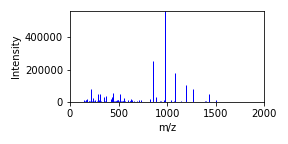
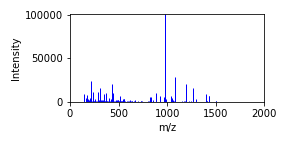
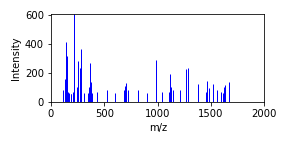
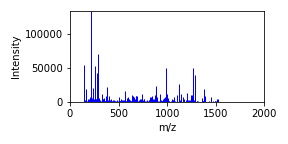
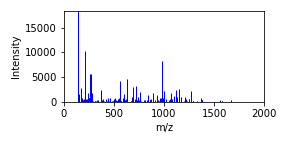
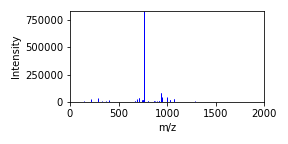
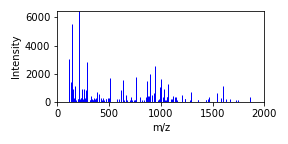
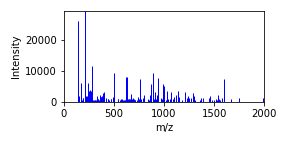
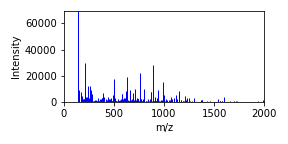
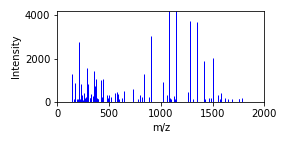

In [13]:
df.head(10).lib.display()

## List columns

In [33]:
df.columns

Index(['set', 'name', 'spectrum', 'spectrum_fp', 'spectrum_fp_count', 'nce',
       'charge', 'precursor_mz', 'peptide', 'num_mods', 'mod_names',
       'mod_positions'],
      dtype='object')

## Iterating through a dataframe

In [ ]:
for row in df.head(10).itertuples():
    print (row.peptide, row.nce)

## Extract a single spectrum from the second row of the dataframe

In [24]:
import inspect
spectrum = df.iloc[1]['spectrum']
type(spectrum)
inspect.getmembers(spectrum)
#for i in dir(spectrum):
#    print(type(spectrum[i]))

[('__class__', massspec.spectrum.spectrum.HiResSpectrum),
 ('__delattr__',
  <method-wrapper '__delattr__' of HiResSpectrum object at 0x7fcb61e7bd30>),
 ('__dict__',
  {'precursor_class': massspec.spectrum.spectrum.HiResIons,
   'precursor_mass_info': <massspec.spectrum.spectrum.MassInfo at 0x7fcb61ccf8b0>,
   'product_class': massspec.spectrum.spectrum.HiResIons,
   'product_mass_info': <massspec.spectrum.spectrum.MassInfo at 0x7fcb61ccf970>,
   'precursor': <massspec.spectrum.spectrum.HiResIons at 0x7fcb61ccf9a0>,
   'products': <massspec.spectrum.spectrum.HiResIons at 0x7fcb61ccfa00>,
   '_filtered': None,
   '_props': {'name': 'AAAACALTPGPLADLAAR/2',
    'id': 1,
    'retention_time': None,
    'set': 'valid',
    'peptide': 'AAAACALTPGPLADLAAR',
    'charge': 2,
    'mod_names': ['Carbamidomethyl'],
    'mod_positions': [4],
    'num_mods': 1,
    'precursor_mz': 855.4538,
    'nce': 35.0}}),
 ('__dir__', <function HiResSpectrum.__dir__()>),
 ('__doc__', '\n    class for a high re

In [33]:
spectrum.props

{'name': 'AAAACALTPGPLADLAAR/2',
 'id': 1,
 'retention_time': None,
 'set': 'valid',
 'peptide': 'AAAACALTPGPLADLAAR',
 'charge': 2,
 'mod_names': ['Carbamidomethyl'],
 'mod_positions': [4],
 'num_mods': 1,
 'precursor_mz': 855.4538,
 'nce': 35.0}

In [18]:
df.head(3)

,set,name,spectrum,spectrum_fp,spectrum_fp_count,nce,charge,precursor_mz,peptide,num_mods,mod_names,mod_positions
id,,,,,,,,,,,,
0,valid,AAAACALTPGPLADLAAR/2,"<img data-content=""massspec/spectrum"" src=""dat...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",83,35.0,2,855.4538,AAAACALTPGPLADLAAR,1,[Carbamidomethyl],[4]
1,valid,AAAACALTPGPLADLAAR/2,"<img data-content=""massspec/spectrum"" src=""dat...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",193,35.0,2,855.4538,AAAACALTPGPLADLAAR,1,[Carbamidomethyl],[4]
2,valid,AAAALGSHGSCSSEVEK/2,"<img data-content=""massspec/spectrum"" src=""dat...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",67,34.0,2,830.8834,AAAALGSHGSCSSEVEK,1,[Carbamidomethyl],[10]


In [19]:
mz = list(map(lambda x: x.products.mz, list(df.head(3)['spectrum'])))
mz

[array([ 143.0823,  153.2575,  159.0917,  162.5977,  169.0972,  175.1193,
         194.0699,  199.1074,  201.7527,  212.1051,  214.1195,  229.1552,
         232.0764,  249.1071,  257.1633,  276.4497,  283.1411,  283.3943,
         285.1567,  302.1834,  303.114 ,  317.1891,  345.1593,  354.1793,
         356.1916,  370.3776,  371.6662,  374.1505,  416.2029,  417.1931,
         425.2171,  428.2024,  428.249 ,  430.278 ,  445.1886,  446.2049,
         457.1753,  467.2682,  469.2735,  471.2018,  487.2299,  488.2367,
         490.7795,  491.2839,  495.9153,  499.2364,  516.2236,  528.2323,
         530.2752,  541.3164,  545.308 ,  558.2726,  570.3232,  601.3148,
         617.2834,  617.3372,  629.3052,  641.3058,  659.3259,  685.3383,
         712.3472,  730.3578,  826.4765,  855.017 ,  855.5167,  856.523 ,
         883.4993,  922.4447,  934.4906,  963.5431,  980.556 ,  981.5587,
        1037.5859, 1038.5812, 1067.8983, 1081.6041, 1082.6077, 1143.0283,
        1194.6899, 1195.6869, 1265.727

In [5]:
%%time
import pyarrow as pa
#spectrums = list(df.head(3)['spectrum'])
spectrums = list(df['spectrum'])
table = pa.table({
    'id': list(map(lambda x: x.props['id'], spectrums)),
    'name': list(map(lambda x: x.props['name'], spectrums)),
    'nce': list(map(lambda x: x.props['nce'], spectrums)),
    'charge': list(map(lambda x: x.props['charge'], spectrums)),
    'precursor_mz': list(map(lambda x: x.props['precursor_mz'], spectrums)),
    'peptide': list(map(lambda x: x.props['peptide'], spectrums)),
    'mz': list(map(lambda x: x.products.mz, spectrums)),
    'intensity': list(map(lambda x: x.products.intensity, spectrums)),
    'mod_names': list(map(lambda x: x.props['mod_names'], spectrums)),
    'mod_positions': list(map(lambda x: x.props['mod_positions'], spectrums)),
})
table.to_pandas()

CPU times: user 193 ms, sys: 33.8 ms, total: 227 ms
Wall time: 258 ms


,id,name,nce,charge,precursor_mz,peptide,mz,intensity,mod_names,mod_positions
0,0,AAAACALTPGPLADLAAR/2,35.0,2,855.4538,AAAACALTPGPLADLAAR,"[143.0823, 153.2575, 159.0917, 162.5977, 169.0...","[14791.5, 5008.6, 11531.8, 5804.6, 12931.0, 18...",[Carbamidomethyl],[4]
1,1,AAAACALTPGPLADLAAR/2,35.0,2,855.4538,AAAACALTPGPLADLAAR,"[143.0814, 169.097, 171.1126, 175.1069, 175.11...","[9555.6, 5174.5, 2428.2, 1175.7, 7806.9, 645.1...",[Carbamidomethyl],[4]
2,2,AAAALGSHGSCSSEVEK/2,34.0,2,830.8834,AAAALGSHGSCSSEVEK,"[110.1102, 115.0864, 128.1915, 129.1023, 130.0...","[57.808, 84.449, 60.078, 157.87, 143.466, 64.9...",[Carbamidomethyl],[10]
3,3,AAAALGSHGSCSSEVEK/2,35.0,2,830.8834,AAAALGSHGSCSSEVEK,"[141.1024, 143.0816, 144.0851, 147.1129, 148.1...","[1824.4, 54472.6, 2028.2, 40570.6, 2104.9, 866...",[Carbamidomethyl],[10]
4,4,AAAALGSHGSCSSEVEK/3,35.0,3,554.2580,AAAALGSHGSCSSEVEK,"[143.0814, 144.0848, 147.1127, 157.1333, 169.0...","[18357.0, 541.5, 5248.8, 1713.8, 2839.1, 600.9...",[Carbamidomethyl],[10]
...,...,...,...,...,...,...,...,...,...,...
22658,22658,YYQAILEENKEK/2,35.0,2,764.3881,YYQAILEENKEK,"[145.4085, 147.113, 154.0983, 155.0818, 172.10...","[1558.0, 4940.5, 1763.1, 3573.9, 9694.3, 5738....",[],[]
22659,22659,YYQAILEENKEK/3,34.0,3,509.9278,YYQAILEENKEK,"[110.0712, 115.3969, 119.049, 126.0309, 129.10...","[93.6, 62.6, 343.6, 57.1, 884.3, 198.6, 97.6, ...",[],[]
22660,22660,YYSGEILVSQAQR/2,34.0,2,757.3859,YYSGEILVSQAQR,"[123.2058, 130.3782, 136.0755, 137.0788, 140.6...","[2563.8, 2678.9, 282787.0, 9214.9, 2816.1, 736...",[],[]
22661,22661,YYSPGYSDTLLQR/2,34.0,2,781.8779,YYSPGYSDTLLQR,"[110.0708, 116.9776, 120.0807, 120.8419, 127.0...","[530.1, 281.2, 854.2, 323.3, 1822.4, 818.7, 39...",[],[]


In [23]:
type(table.slice(2,1).to_pydict()['mz'])

list

In [17]:
df = table.to_pandas()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292012 entries, 0 to 292011
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   292012 non-null  int64  
 1   name                 292012 non-null  object 
 2   peptide              292012 non-null  object 
 3   charge               292012 non-null  int8   
 4   precursor_mz         292012 non-null  float64
 5   precursor_intensity  0 non-null       float32
 6   precursor_massinfo   0 non-null       object 
 7   ion_mode             0 non-null       object 
 8   nce                  292012 non-null  float32
 9   ev                   292012 non-null  float32
 10  instrument           0 non-null       object 
 11  instrument_type      0 non-null       object 
 12  ionization           0 non-null       object 
 13  mod_names            292012 non-null  object 
 14  mod_positions        292012 non-null  object 
 15  mz               

In [19]:
type(df.head(1)['mz'][0])

numpy.ndarray

In [ ]:
import pyarrow.parquet as pq

In [65]:
%%time
pq.write_table(table, '/home/djs10/tmp/ChoLibVal.parquet')
#pq.write_table(table, '/home/djs10/tmp/HmSynLib.parquet')

CPU times: user 133 ms, sys: 206 ms, total: 339 ms
Wall time: 337 ms


In [66]:
%%time
table2 = pq.read_table('/home/djs10/tmp/ChoLibVal.parquet')
#table2 = pq.read_table('/home/djs10/tmp/HmSynLib.parquet')

CPU times: user 106 ms, sys: 45 ms, total: 151 ms
Wall time: 76.1 ms


In [57]:
sys.getsizeof(table2)

3456467075

In [67]:
table2.nbytes

53499843

In [69]:
table2.to_pandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22663 entries, 0 to 22662
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22663 non-null  int64  
 1   name           22663 non-null  object 
 2   nce            22663 non-null  float64
 3   charge         22663 non-null  int64  
 4   precursor_mz   22663 non-null  float64
 5   peptide        22663 non-null  object 
 6   mz             22663 non-null  object 
 7   intensity      22663 non-null  object 
 8   mod_names      22663 non-null  object 
 9   mod_positions  22663 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.7+ MB


In [54]:
mz=[]
for row in df.itertuples():
    mz.append(row.spectrum.products.mz)
table = table.add_column(table.num_columns,"mz", pa.array(mz))
del(mz)

In [57]:
intensity=[]
for row in df.itertuples():
    intensity.append(row.spectrum.products.intensity)
table = table.add_column(table.num_columns,"intensity", pa.array(intensity))
del(intensity)

In [58]:
table.column_names

['set',
 'name',
 'spectrum_fp_count',
 'nce',
 'charge',
 'precursor_mz',
 'peptide',
 'num_mods',
 'mod_names',
 'mod_positions',
 'id',
 'mz',
 'intensity']

# Iterate through the product ions

In [21]:
for mz, intensity in spectrum.products:
    print(f'{mz}: {intensity}, ', end='')

143.0814: 9555.6, 169.097: 5174.5, 171.1126: 2428.2, 175.1069: 1175.7, 175.1187: 7806.9, 178.0645: 645.1, 181.0971: 2623.7, 183.1495: 1770.8, 185.0921: 4004.0, 185.1288: 983.4, 199.1073: 2854.3, 203.1022: 2225.3, 203.412: 489.7, 204.0803: 4532.0, 211.1438: 1671.5, 212.103: 6959.1, 214.1185: 23984.8, 215.0481: 1035.3, 215.1219: 1943.5, 215.1392: 1652.7, 216.0967: 632.6, 229.1299: 970.3, 231.1446: 601.8, 232.0748: 11826.6, 235.1929: 547.3, 240.1344: 3195.6, 242.1137: 1025.5, 246.1558: 1514.8, 255.1454: 790.9, 256.1652: 1376.9, 257.1605: 3523.6, 258.0901: 1119.1, 268.1656: 1623.7, 282.1807: 1542.2, 283.14: 10639.1, 284.1443: 1021.0, 285.1555: 11955.3, 286.1599: 1072.8, 286.1761: 2533.2, 293.366: 528.7, 298.177: 1429.9, 302.1818: 2634.5, 303.1121: 15782.5, 304.1151: 1344.9, 309.1558: 945.0, 311.1712: 2335.2, 317.1934: 2115.0, 327.2036: 961.2, 328.1647: 1131.6, 329.1273: 3077.6, 331.1088: 859.4, 337.2232: 2252.0, 339.2033: 1220.8, 341.1834: 794.7, 345.1589: 6582.2, 346.1541: 1361.2, 353.218

## Iterate by index through the product ions

In [22]:
for i in range(len(spectrum.products)):
    print(spectrum.products[i], end=' ')

(143.0814, 9555.6) (169.097, 5174.5) (171.1126, 2428.2) (175.1069, 1175.7) (175.1187, 7806.9) (178.0645, 645.1) (181.0971, 2623.7) (183.1495, 1770.8) (185.0921, 4004.0) (185.1288, 983.4) (199.1073, 2854.3) (203.1022, 2225.3) (203.412, 489.7) (204.0803, 4532.0) (211.1438, 1671.5) (212.103, 6959.1) (214.1185, 23984.8) (215.0481, 1035.3) (215.1219, 1943.5) (215.1392, 1652.7) (216.0967, 632.6) (229.1299, 970.3) (231.1446, 601.8) (232.0748, 11826.6) (235.1929, 547.3) (240.1344, 3195.6) (242.1137, 1025.5) (246.1558, 1514.8) (255.1454, 790.9) (256.1652, 1376.9) (257.1605, 3523.6) (258.0901, 1119.1) (268.1656, 1623.7) (282.1807, 1542.2) (283.14, 10639.1) (284.1443, 1021.0) (285.1555, 11955.3) (286.1599, 1072.8) (286.1761, 2533.2) (293.366, 528.7) (298.177, 1429.9) (302.1818, 2634.5) (303.1121, 15782.5) (304.1151, 1344.9) (309.1558, 945.0) (311.1712, 2335.2) (317.1934, 2115.0) (327.2036, 961.2) (328.1647, 1131.6) (329.1273, 3077.6) (331.1088, 859.4) (337.2232, 2252.0) (339.2033, 1220.8) (341.18

### Access underlying numpy arrays

In [23]:
print(spectrum.products.mz)
print(spectrum.products.intensity)

[ 143.0814  169.097   171.1126  175.1069  175.1187  178.0645  181.0971
  183.1495  185.0921  185.1288  199.1073  203.1022  203.412   204.0803
  211.1438  212.103   214.1185  215.0481  215.1219  215.1392  216.0967
  229.1299  231.1446  232.0748  235.1929  240.1344  242.1137  246.1558
  255.1454  256.1652  257.1605  258.0901  268.1656  282.1807  283.14
  284.1443  285.1555  286.1599  286.1761  293.366   298.177   302.1818
  303.1121  304.1151  309.1558  311.1712  317.1934  327.2036  328.1647
  329.1273  331.1088  337.2232  339.2033  341.1834  345.1589  346.1541
  353.2189  354.1769  355.1793  356.1933  357.211   358.2065  363.3883
  365.2181  366.2212  368.1942  369.3904  370.4914  372.1714  374.149
  375.153   380.1929  384.1859  386.2027  396.2243  397.2071  398.2401
  400.1644  401.1676  402.1434  408.2588  410.2415  416.1944  417.192
  418.1938  422.2396  425.2144  428.1953  430.2767  431.2812  436.2548
  442.2117  445.1862  446.1865  446.2101  454.23    459.2378  471.2021
  473.1871

## Access mass tolerance and type

In [ ]:
print (spectrum.precursor.tolerance, spectrum.precursor.tolerance_type)

## Query on the dataframe to return a dataframe containing rows that match the query, then display the new dataframe
Avoid using query() as it currently doesn't copy metadata from one dataframe to another.

In [ ]:
df_single_peptide = df.query('peptide == "AAAACALTPGPLADLAAR"')
df_single_peptide.lib.display()

## Select one spectrum from the new dataframe, filter out low m/z peaks, normalize the base intensity to 1.0

In [ ]:
new_spectrum = df_single_peptide.iloc[0]['spectrum']
new_spectrum = new_spectrum.filter(min_mz=500).norm(1.0)
new_spectrum

## Aggregation functions
### Number of ions

In [ ]:
new_spectrum.num_ions()

### Total ion current

In [ ]:
new_spectrum.total_intensity()

## Operations on pairs of spectra
### First, take a second spectra from the new dataframe

In [ ]:
new_spectrum_2 = df_single_peptide.iloc[1]['spectrum']
new_spectrum_2

### Cosine score between two spectra

In [ ]:
new_spectrum.cosine_score(new_spectrum_2)

### Cosine score between mz subranges

In [ ]:
new_spectrum.filter(min_mz=500, max_mz=1000).cosine_score(new_spectrum_2.filter(min_mz=500, max_mz=1000))

### Merge two spectra, first by creating a filter spectrum

In [ ]:
new_spectrum_2.filter(max_mz=500, inplace=True)
new_spectrum_2

#### Then merge with previous spectrum

In [ ]:
new_spectrum.merge(new_spectrum_2.norm(1))

## Input/output
The spectral library in the form of a dataframe has the ability to read and write a variety of formats in addition to reading from SQL as listed above.
There is a command line program, apps/process/libraries/converter.py, that uses the following APIs
to convert to/from these file types.

### MSP

In [ ]:
df_single_peptide.lib.to_msp("single_peptide.msp")
df_2 = LibraryAccessor.read_msp("single_peptide.msp")

#### save a single spectrum at row 0 as an msp file

In [ ]:
df_single_peptide.iloc[[0]].lib.to_msp("single_spectrum.msp")

### MGF

In [ ]:
# df_3 = LibraryAccessor.read_mgf("single_peptide.mgf")

### SDF

In [ ]:
# df_3 = LibraryAccessor.from_sdf("test.sdf")

### PKL (python pickle)

In [ ]:
import pandas
df_single_peptide.to_pickle('single_peptide.pkl')
df_4 = pandas.read_pickle('single_peptide.pkl')

## CSV

In [ ]:
df_single_peptide.to_csv('single_peptide.csv')